In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import ipywidgets as widget
from IPython.core.display import display, HTML
from decideanalyses import settings
from decideanalyses.helpers import get_all_actors, list_to_sql_param
%matplotlib inline

conn = sqlite3.connect(settings.DATABASE_URL)

In [14]:
actors = get_all_actors(conn, settings.MODEL_RUN_IDS)

sql = """SELECT SUM(e.own)            as own,
       SUM(e.inner_positive) as inner_positive,
       SUM(e.inner_negative) as inner_negative,
       SUM(e.outer_positive) as outer_positive,
       SUM(e.outer_negative) as outer_negative,
       a.name                   actor,
       m.p
FROM externality e
         JOIN actor a on e.actor_id = a.id
         JOIN iteration i on e.iteration_id = i.id
         JOIN repetition r on i.repetition_id = r.id
         JOIN modelrun m on r.model_run_id = m.id         
WHERE m.id IN(%s)
GROUP BY e.actor_id, m.id""" % list_to_sql_param(settings.MODEL_RUN_IDS) 

df = pd.read_sql_query(
    sql,
    con=conn,
    index_col=['p'],
)

# Totaalscores
Alle resultaten zijn de totaalscore van de verschillende externaliteiten berekend gedeelt door het aantal herhalingen (1000). 
Hiervoor is gekozen omdat de kleinere ruilen het gemiddelde nogal kunnen beinvloeden. Het aantal ruilen met een `expected utility > 1.0` komt namelijk veel minder vaak voor dan ruilen met een `expected utility < 0.5`. Het gemiddelde komt hierdoor niet boven de `0.4`. 

Eveneens is er geen onderscheid gemaakt tussen de verschillende onderhandelingsrondes. Dit is niet nodig omdat je op deze manier de externaliteit per `p` waarde kunt vergelijken over het gehele model.


In [15]:
df_inner_positive = pd.pivot_table(df, index=['p'], columns=['actor'], values=['inner_positive'])
df_inner_positive

inner_positive                                                  \
actor         AILAC2        ALBA      AOSIS African_grp Arab_statess   
p                                                                      
0.0       121.141667  152.382696  75.143937   97.978589    92.337685   
0.8       130.349589  169.615808  88.213595  108.881889    88.299098   

                                                                          \
actor     Brazil      China         EIG       EU28      India      Japan   
p                                                                          
0.0    41.069903  38.771242  102.028602  66.398032  47.715745  82.339029   
0.8    48.523361  52.700998  113.408488  81.670522  64.546572  98.646884   

                                                      
actor    LDCs_BGD     Russia        USA Umbrella_min  
p                                                     
0.0    118.247062  36.965918  72.339743    82.780410  
0.8    132.960202  47.191301  92.750890    94.671919

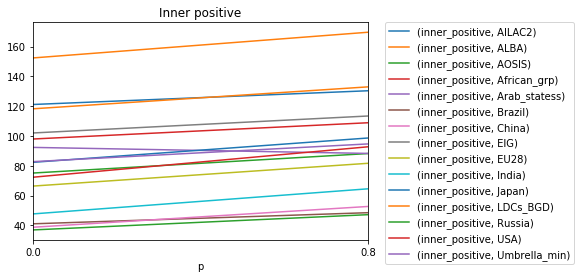

In [16]:
plt = df_inner_positive.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('Inner positive')
plt.set_xticks(df_inner_positive.index)
plt

In [17]:
df_inner_negative = pd.pivot_table(df, index=['p'], columns=['actor'], values=['inner_negative'])
df_inner_negative

inner_negative                                                   \
actor         AILAC2        ALBA       AOSIS African_grp Arab_statess   
p                                                                       
0.0      -530.955420 -433.719008 -467.411351 -502.469229  -504.564277   
0.8      -453.085082 -436.997033 -472.719541 -494.740832  -433.682898   

                                                                               \
actor      Brazil       China         EIG        EU28       India       Japan   
p                                                                               
0.0   -431.924228 -387.647706 -617.375371 -477.277511 -413.318511 -445.221950   
0.8   -450.490158 -376.421266 -591.487785 -460.952481 -402.036519 -463.801787   

                                                        
actor    LDCs_BGD      Russia         USA Umbrella_min  
p                                                       
0.0   -388.758734 -308.386879 -348.342958  -601.357830  
0.8   -366.170051 -275.395764 -382.943979  -613.203445

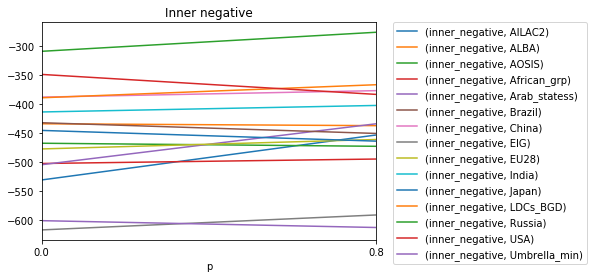

In [18]:
plt = df_inner_negative.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('Inner negative')
plt.set_xticks(df_inner_negative.index)
plt

In [19]:
df_op = pd.pivot_table(df, index=['p'], columns=['actor'], values=['outer_positive'])
df_op

outer_positive                                                  \
actor         AILAC2       ALBA       AOSIS African_grp Arab_statess   
p                                                                      
0.0       337.023399  359.44169  310.827305  266.888241   248.724186   
0.8       340.919413  329.99113  290.409526  261.812274   275.938968   

                                                                               \
actor      Brazil       China         EIG        EU28       India       Japan   
p                                                                               
0.0    183.553808  189.815050  194.573868  192.626483  313.639810  209.018695   
0.8    165.346305  176.987703  205.138453  184.925118  277.296174  244.485331   

                                                        
actor    LDCs_BGD      Russia         USA Umbrella_min  
p                                                       
0.0    408.404930  173.985764  307.398161   176.679486  
0.8    408.849638  185.442424  237.216262   198.090916

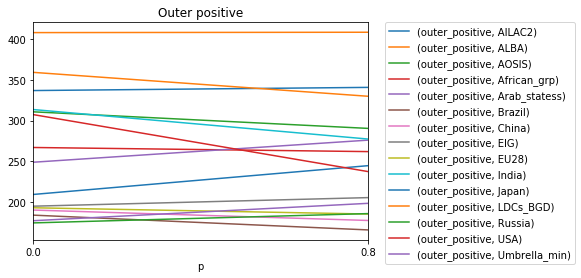

In [20]:
plt = df_op.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('Outer positive')
plt.set_xticks(df_op.index)
plt

In [21]:
df_on = pd.pivot_table(df, index=['p'], columns=['actor'], values=['outer_negative'])
df_on

outer_negative                                                   \
actor         AILAC2        ALBA       AOSIS African_grp Arab_statess   
p                                                                       
0.0      -944.912352 -619.276758 -930.612095 -859.533392  -708.124084   
0.8      -910.184039 -550.902242 -906.024817 -777.686790  -780.303685   

                                                                               \
actor      Brazil       China         EIG        EU28       India       Japan   
p                                                                               
0.0   -745.678955 -728.529745 -949.958487 -747.351229 -595.177671 -661.364001   
0.8   -733.203899 -678.009809 -898.256134 -772.566130 -564.597809 -665.626281   

                                                        
actor    LDCs_BGD      Russia         USA Umbrella_min  
p                                                       
0.0   -776.243880 -548.464151 -768.167369  -761.908325  
0.8   -750.484891 -563.180166 -708.590814  -737.049029

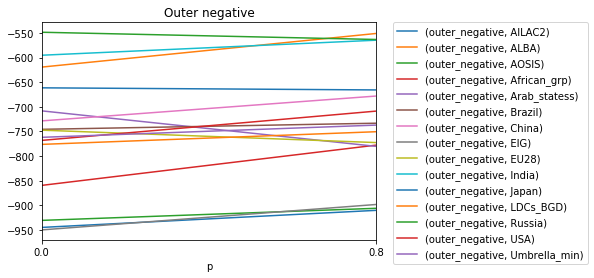

In [22]:
plt = df_on.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('Outer negative')
plt.set_xticks(df_on.index)
plt

In [23]:
df_own = pd.pivot_table(df, index=['p'], columns=['actor'], values=['own'])
df_own

own                                                           \
actor     AILAC2      ALBA      AOSIS African_grp Arab_statess     Brazil   
p                                                                           
0.0    26.949199  3.957685  16.421374   16.779302    25.926701  32.882101   
0.8    28.323280  4.425726  18.662670   17.387429    26.373442  34.110363   

                                                                        \
actor      China        EIG       EU28     India      Japan   LDCs_BGD   
p                                                                        
0.0    35.573055  13.814053  40.779177  4.843883  21.524646  24.523031   
0.8    35.296631  14.926149  39.990265  7.219604  23.143260  24.702406   

                                          
actor     Russia        USA Umbrella_min  
p                                         
0.0    51.882422  80.506565    10.359596  
0.8    58.618052  97.419067    13.040676

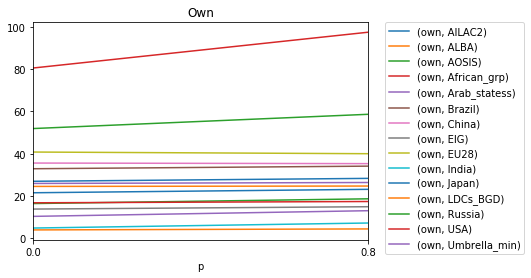

In [24]:
plt = df_own.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('Own')
plt.set_xticks(df_own.index)
plt